# Assignment 1 2AMM10 2023-2024

## Group: [Fill in your group name]
### Member 1: [Fill in your name]
### Member 2: [Fill in your name]
### Member 3: [Fill in your name]

In [1]:
import os
import pandas as pd
import torch 
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import torchvision
from torchvision import transforms
import kagglehub
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# add additonal imports here
class FashionDataset(Dataset):
    def __init__(self, csv_file, img_dir,column_class="articleTypeId", transform=None):
        """
        Args:
            csv_file (str): Path to the CSV file with labels.
            img_dir (str): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.df = pd.read_csv(csv_file)  # load CSV file
        self.img_dir = img_dir  # image folder path
        self.transform = transform  # image transformations
        self.targets = list(self.df[column_class].values)


    def __len__(self):
        return len(self.targets)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, f"{self.df.loc[idx,'imageId']}.jpg")  # Get image filename
        image = Image.open(img_name).convert("RGB")  # Load image

        if self.transform:
            image = self.transform(image)  # Apply transformations

        return image, self.targets[idx]


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/home

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/homebrew/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/home

AttributeError: _ARRAY_API not found

Download data with kagglehub

In [2]:
dataset_path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-small")
img_dir = os.path.join(dataset_path,"images")

The different datasets can be loaded using the class `FashionDataset` which is a custon PyTorch dataset (see [Datasets & DataLoaders](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) for more information). Below an example of how to use the `FashionDataset` constructor as well as some visualizations. Please note that you may have to adapt the arguments to match the strucucture of your working directory.

In [3]:
dataset = FashionDataset("dataset/train.csv",img_dir)

In [4]:
dataset.df.head()

,imageId,articleTypeName,categoryName,articleTypeId,categoryId
0,35180,Backpacks,Bags,15,2
1,33585,Tshirts,Topwear,0,0
2,9464,Shirts,Topwear,1,0
3,8194,Shirts,Topwear,1,0
4,42231,Tops,Topwear,6,0


<class 'PIL.Image.Image'>


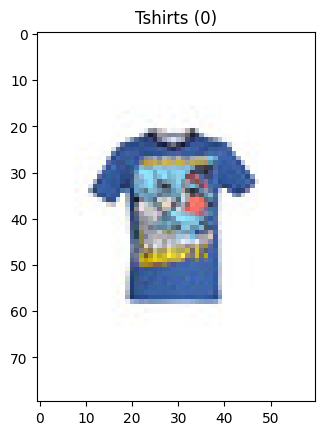

<class 'PIL.Image.Image'>


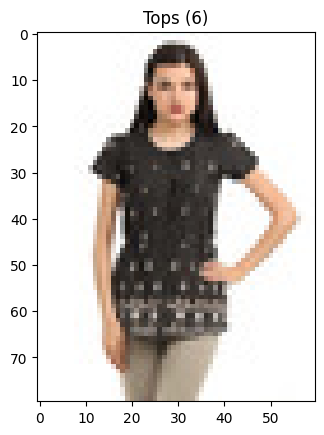

<class 'PIL.Image.Image'>


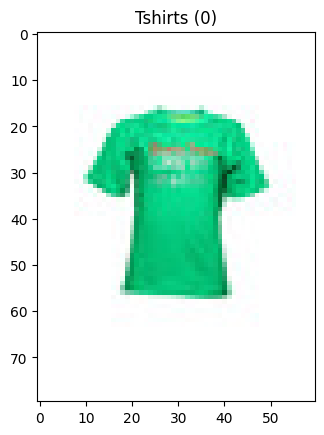

In [5]:
np.random.seed(42)
random_indices = np.random.choice(len(dataset),3)

for i in random_indices:
    img, label = dataset[i]
    print(type(img))
    plt.title(dataset.df.iloc[i]["articleTypeName"]+f" ({label.item()})")
    plt.imshow(img)
    plt.show()

## Loading different datasets

In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for ResNet
    transforms.ToTensor(),          # Convert PIL Image to Tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize for RGB images
    # your image transformations 
]) 
train_dataset = FashionDataset("dataset/train.csv",img_dir,transform=transform)
main_test_dataset =  FashionDataset("dataset/main_test.csv",img_dir,transform=transform)
new_test_dataset =  FashionDataset("dataset/new_test.csv",img_dir,transform=transform)
main_support_dataset =  FashionDataset("dataset/main_support.csv",img_dir,transform=transform)
new_support_dataset =  FashionDataset("dataset/new_support.csv",img_dir,transform=transform)
merged_test_dataset =  FashionDataset("dataset/merged_test.csv",img_dir,transform=transform) # merged corresponds to main+new
merged_support_dataset =  FashionDataset("dataset/merged_support.csv",img_dir,transform=transform)

# datasets with categories
main_test_dataset_cat =  FashionDataset("dataset/main_test.csv",img_dir,column_class="categoryId",transform=transform)
main_support_dataset_cat =  FashionDataset("dataset/main_support.csv",img_dir,column_class="categoryId",transform=transform)


label_id_to_label_name = {i: train_dataset.df[train_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39)} 
label_id_to_label_name.update({i: new_test_dataset.df[new_test_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39,39+30)})

## Task 1

In [12]:
# your solution
# train dataset: train_dataset
# test datset: main_test_dataset

train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dl = DataLoader(main_test_dataset, batch_size=64, shuffle=True)

model = torchvision.models.resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 39)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    
    model.train()
    all_preds = []
    all_labels = []
    running_loss = 0.0
    
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    bal_acc = balanced_accuracy_score(all_labels, all_preds)

    print(f"Epoch [{epoch+1}/5], Loss: {running_loss/len(train_dl):.4f}, Accuracy: {acc:.4f}, Balanced Accuracy: {bal_acc:.4f}")

Epoch [1/5], Loss: 0.8996, Accuracy: 0.7107, Balanced Accuracy: 0.5874
Epoch [2/5], Loss: 0.4941, Accuracy: 0.8277, Balanced Accuracy: 0.7502
Epoch [3/5], Loss: 0.4027, Accuracy: 0.8595, Balanced Accuracy: 0.7996
Epoch [4/5], Loss: 0.3436, Accuracy: 0.8790, Balanced Accuracy: 0.8279
Epoch [5/5], Loss: 0.2959, Accuracy: 0.8929, Balanced Accuracy: 0.8487
Epoch [6/5], Loss: 0.2571, Accuracy: 0.9066, Balanced Accuracy: 0.8721
Epoch [7/5], Loss: 0.2201, Accuracy: 0.9198, Balanced Accuracy: 0.8900
Epoch [8/5], Loss: 0.1829, Accuracy: 0.9337, Balanced Accuracy: 0.9101
Epoch [9/5], Loss: 0.1527, Accuracy: 0.9422, Balanced Accuracy: 0.9218
Epoch [10/5], Loss: 0.1156, Accuracy: 0.9578, Balanced Accuracy: 0.9429


In [13]:
# Evaluation phase on test set
model.eval()
test_preds = []
test_labels = []
test_loss = 0.0
with torch.no_grad():  # Disable gradient computation for test set
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
# Calculate test accuracy and balanced accuracy
test_acc = accuracy_score(test_labels, test_preds)
test_bal_acc = balanced_accuracy_score(test_labels, test_preds)
# Print statistics
print(f"Test Loss: {test_loss/len(test_dl):.4f}, Test Accuracy: {test_acc:.4f}, "
      f"Test Balanced Accuracy: {test_bal_acc:.4f}")

Test Loss: 0.4095, Test Accuracy: 0.8773, Test Balanced Accuracy: 0.8266


### Try a new data loader


In [7]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust colors
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3),  # Normalize
])
train_dataset = FashionDataset("dataset/train.csv",img_dir,transform=transform)
main_test_dataset =  FashionDataset("dataset/main_test.csv",img_dir,transform=transform)
new_test_dataset =  FashionDataset("dataset/new_test.csv",img_dir,transform=transform)
main_support_dataset =  FashionDataset("dataset/main_support.csv",img_dir,transform=transform)
new_support_dataset =  FashionDataset("dataset/new_support.csv",img_dir,transform=transform)
merged_test_dataset =  FashionDataset("dataset/merged_test.csv",img_dir,transform=transform) # merged corresponds to main+new
merged_support_dataset =  FashionDataset("dataset/merged_support.csv",img_dir,transform=transform)

# datasets with categories
main_test_dataset_cat =  FashionDataset("dataset/main_test.csv",img_dir,column_class="categoryId",transform=transform)
main_support_dataset_cat =  FashionDataset("dataset/main_support.csv",img_dir,column_class="categoryId",transform=transform)


label_id_to_label_name = {i: train_dataset.df[train_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39)} 
label_id_to_label_name.update({i: new_test_dataset.df[new_test_dataset.df["articleTypeId"]==i]["articleTypeName"].iloc[0] for i in range(39,39+30)})

In [23]:
train_dl = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dl = DataLoader(main_test_dataset, batch_size=64, shuffle=True)

model = torchvision.models.resnet18(weights=None)
model.fc = torch.nn.Linear(model.fc.in_features, 39)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    
    model.train()
    all_preds = []
    all_labels = []
    running_loss = 0.0
    
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    bal_acc = balanced_accuracy_score(all_labels, all_preds)

    print(f"Epoch [{epoch+1}/10], Loss: {running_loss/len(train_dl):.4f}, Accuracy: {acc:.4f}, Balanced Accuracy: {bal_acc:.4f}")

Epoch [1/10], Loss: 0.9605, Accuracy: 0.6993, Balanced Accuracy: 0.5708
Epoch [2/10], Loss: 0.5305, Accuracy: 0.8208, Balanced Accuracy: 0.7394
Epoch [3/10], Loss: 0.4286, Accuracy: 0.8521, Balanced Accuracy: 0.7870
Epoch [4/10], Loss: 0.3611, Accuracy: 0.8724, Balanced Accuracy: 0.8186
Epoch [5/10], Loss: 0.3121, Accuracy: 0.8904, Balanced Accuracy: 0.8451
Epoch [6/10], Loss: 0.2745, Accuracy: 0.9018, Balanced Accuracy: 0.8628
Epoch [7/10], Loss: 0.2292, Accuracy: 0.9161, Balanced Accuracy: 0.8838
Epoch [8/10], Loss: 0.1930, Accuracy: 0.9294, Balanced Accuracy: 0.9041
Epoch [9/10], Loss: 0.1509, Accuracy: 0.9458, Balanced Accuracy: 0.9270
Epoch [10/10], Loss: 0.1267, Accuracy: 0.9534, Balanced Accuracy: 0.9360


In [24]:
# Evaluation phase on test set
model.eval()
test_preds = []
test_labels = []
test_loss = 0.0
with torch.no_grad():  # Disable gradient computation for test set
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        preds = torch.argmax(outputs, dim=1)
        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
# Calculate test accuracy and balanced accuracy
test_acc = accuracy_score(test_labels, test_preds)
test_bal_acc = balanced_accuracy_score(test_labels, test_preds)
# Print statistics
print(f"Test Loss: {test_loss/len(test_dl):.4f}, Test Accuracy: {test_acc:.4f}, "
      f"Test Balanced Accuracy: {test_bal_acc:.4f}")

Test Loss: 0.4039, Test Accuracy: 0.8768, Test Balanced Accuracy: 0.8291


## Task 2

In [8]:
import os
import pandas as pd
import torch 
from torch.utils.data import Dataset
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from torchvision import transforms
import kagglehub
from torch.utils.data import DataLoader
from torchvision.models import resnet18
from itertools import combinations
import tqdm
from tqdm import tqdm
from torch.utils.data.sampler import BatchSampler
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [9]:
# your solution
# train dataset: train_dataset
# test and support dataset: see scenarios table
class BalancedBatchSampler(BatchSampler):
    """
    Returns batches of size n_classes * n_samples
    """
    def __init__(self, labels, n_classes, n_samples):
        self.labels = labels
        self.labels_set = list(set(self.labels))
        self.label_to_indices = {label: np.where(  np.array(self.labels) == label)[0]
                                 for label in self.labels_set}
        for l in self.labels_set:
            np.random.shuffle(self.label_to_indices[l])
        self.used_label_indices_count = {label: 0 for label in self.labels_set}
        self.count = 0
        self.n_classes = n_classes
        self.n_samples = n_samples
        self.n_dataset = len(self.labels)
        self.batch_size = self.n_samples * self.n_classes

    def __iter__(self):
        self.count = 0
        while self.count + self.batch_size < self.n_dataset:
            classes = np.random.choice(self.labels_set, self.n_classes, replace=False)
            indices = []
            for class_ in classes:
                indices.extend(self.label_to_indices[class_][
                               self.used_label_indices_count[class_]:self.used_label_indices_count[
                                                                         class_] + self.n_samples])
                self.used_label_indices_count[class_] += self.n_samples
                if self.used_label_indices_count[class_] + self.n_samples > len(self.label_to_indices[class_]):
                    np.random.shuffle(self.label_to_indices[class_])
                    self.used_label_indices_count[class_] = 0
            yield indices
            self.count += self.n_classes * self.n_samples

    def __len__(self):
        return self.n_dataset // self.batch_size

In [10]:
train_dataset_sampler = BalancedBatchSampler(train_dataset.targets, n_classes=39, n_samples=3)
main_test_dataset_sampler = BalancedBatchSampler(main_test_dataset.targets, n_classes=39, n_samples=3)
new_test_dataset_sampler = BalancedBatchSampler(new_test_dataset.targets, n_classes=30, n_samples=3)
main_support_dataset_sampler = BalancedBatchSampler(main_support_dataset.targets, n_classes=39, n_samples=3)
new_support_dataset_sampler = BalancedBatchSampler(new_support_dataset.targets, n_classes=30, n_samples=3)
merged_test_dataset_sampler = BalancedBatchSampler(merged_test_dataset.targets, n_classes=69, n_samples=3)
merged_support_dataset_sampler = BalancedBatchSampler(merged_support_dataset.targets, n_classes=69, n_samples=3)

# check number of workers
triplets_train_dataset = torch.utils.data.DataLoader(train_dataset, batch_sampler=train_dataset_sampler)
triplets_main_test_dataset = torch.utils.data.DataLoader(main_test_dataset, batch_sampler=main_test_dataset_sampler)
triplets_new_test_dataset = torch.utils.data.DataLoader(new_test_dataset, batch_sampler=new_test_dataset_sampler)
triplets_main_support_dataset = torch.utils.data.DataLoader(main_support_dataset, batch_sampler=main_support_dataset_sampler)
triplets_new_support_dataset = torch.utils.data.DataLoader(new_support_dataset, batch_sampler=new_support_dataset_sampler)
triplets_merged_test_dataset = torch.utils.data.DataLoader(merged_test_dataset, batch_sampler=merged_test_dataset_sampler)
triplets_merged_support_dataset = torch.utils.data.DataLoader(merged_support_dataset, batch_sampler=merged_support_dataset_sampler)

In [11]:
class RandomTripletSelector():
    """
    Select random negative  example for  each positive pair  to create triplets
    """
    def __init__(self):
        super(RandomTripletSelector, self).__init__()

    def get_triplets(self, embeddings, labels):
        labels = labels.cpu().data.numpy()
        triplets = []
        for label in set(labels):
            label_mask = (labels == label)
            label_indices = np.where(label_mask)[0]
            if len(label_indices) < 2:
                continue
            negative_indices = np.where(np.logical_not(label_mask))[0]
            anchor_positives = list(combinations(label_indices, 2))  # All anchor-positive pairs
            temp_triplets = [[anchor_positive[0], anchor_positive[1], np.random.choice(negative_indices)] for anchor_positive in anchor_positives]
            triplets += temp_triplets

        return torch.LongTensor(np.array(triplets))

class TripletLoss(nn.Module):
    """
    Triplets loss
    Takes a batch of embeddings and corresponding labels.
    Triplets are generated using triplet_selector object that take embeddings and targets and return indices of
    triplets
    """
    def __init__(self, margin, triplet_selector):
        super(TripletLoss, self).__init__()
        self.margin = margin
        self.triplet_selector = triplet_selector

    def forward(self, embeddings, target):
        triplets = self.triplet_selector.get_triplets(embeddings, target)
        if embeddings.is_cuda:
            triplets = triplets.to(embeddings.device)

        anchor_idx= triplets[:, 0]
        positive_idx= triplets[:, 1]
        negative_idx= triplets[:, 2]

        ap_distances = (embeddings[anchor_idx] - embeddings[positive_idx]).pow(2).sum(1)  # .pow(.5)
        an_distances = (embeddings[anchor_idx] - embeddings[negative_idx]).pow(2).sum(1)  # .pow(.5)
        losses = F.relu(ap_distances - an_distances + self.margin)
        return losses.mean()

class Trainer():
    def __init__(self,
                 model: torch.nn.Module,
                 device: torch.device,
                 criterion: torch.nn.Module,
                 optimizer: torch.optim.Optimizer,
                 training_DataLoader: torch.utils.data.DataLoader,
                 validation_DataLoader: torch.utils.data.DataLoader ,
                 epochs: int
                 ):

        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.training_DataLoader = training_DataLoader
        self.validation_DataLoader = validation_DataLoader
        self.device = device
        self.epochs = epochs

    def run_trainer(self):
        for epoch in tqdm(range(self.epochs)):
            self.model.train() 
            train_losses=[]
            for batch in self.training_DataLoader:
                x,y=batch
                input, target = x.to(self.device), y.to(self.device)
                self.optimizer.zero_grad()
                out = self.model(input)
                loss = self.criterion(out, target)

                loss_value = loss.item()
                #print(f"loss: {loss_value:.4f}", end=' ')
                train_losses.append(loss_value)

                loss.backward()
                self.optimizer.step()

            self.model.eval()
            valid_losses = []

            for batch in self.validation_DataLoader:
                x,y=batch
                input, target = x.to(self.device), y.to(self.device)  # send to device (GPU or CPU)

                with torch.no_grad():
                    out = self.model(input)   # one forward pass
                    loss = self.criterion(out, target) # calculate loss
                    loss_value = loss.item()
                    valid_losses.append(loss_value)

            print(
                f'EPOCH: {epoch+1:0>{len(str(self.epochs))}}/{self.epochs}',
                end=' '
            )
            print(f'LOSS: {np.mean(train_losses):.4f}',end=' ')
            print(f'VAL-LOSS: {np.mean(valid_losses):.4f}',end='\n')

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

model = resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 39)
model.to(device)
triplet_selector = RandomTripletSelector()
criterion = TripletLoss(margin=1.0, triplet_selector=triplet_selector)
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

train_loader = triplets_train_dataset
val_loader   = triplets_main_support_dataset

num_epochs = 30
trainer = Trainer(
    model=model,
    device=device,
    criterion=criterion,
    optimizer=optimizer,
    training_DataLoader=train_loader,
    validation_DataLoader=val_loader,
    epochs=num_epochs
)

'uncomment to run the trainer'
#trainer.run_trainer()

# Save the embedding weights
os.makedirs("checkpoints", exist_ok=True)
torch.save(model.state_dict(), "checkpoints/embedding_net.pth")
print("Training complete. Model saved to checkpoints/embedding_net.pth")

Using device: cpu


/opt/homebrew/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Training complete. Model saved to checkpoints/embedding_net.pth


In [13]:
checkpoint = torch.load('checkpoints/embedding_net.pth', map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

## Testing the model on different scenarios

In [14]:
def extract_embeddings(model, dataloader):
    embeddings = []
    labels = []
    model.eval()
    with torch.no_grad():
        for i, (x, y) in enumerate(dataloader):
            x = x.to(device)
            output = model(x)
            embeddings.append(output.cpu())
            labels.append(y.cpu())
    return torch.cat(embeddings), torch.cat(labels)

In [20]:

# scenario 1
embeddings1, labels1 = extract_embeddings(model, triplets_main_test_dataset)
embeddings2, labels2 = extract_embeddings(model, triplets_train_dataset)

# scenario 2
embeddings3, labels3 = extract_embeddings(model, triplets_main_test_dataset)
embeddings4, labels4 = extract_embeddings(model, triplets_main_support_dataset)

# scenario 3
embeddings5, labels5 = extract_embeddings(model, triplets_new_test_dataset)
embeddings6, labels6 = extract_embeddings(model, triplets_new_support_dataset)

# scenario 4
embeddings7, labels7 = extract_embeddings(model, triplets_merged_test_dataset)
embeddings8, labels8 = extract_embeddings(model, triplets_merged_support_dataset)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def evaluate_scenario(test_embeddings, test_labels, support_embeddings, support_labels):
    # Fit k-NN on the support set
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(support_embeddings, support_labels)

    # Predict on the test set
    preds = knn.predict(test_embeddings)

    # Compute accuracy
    acc = accuracy_score(test_labels, preds)
    return acc

# Scenario 1: Main test set with main support set
acc1 = evaluate_scenario(embeddings1, labels1, embeddings2, labels2)
print(f"Scenario 1 - Main Test Set with Main Support Set Accuracy: {acc1:.4f}")

# Scenario 2: Main test set with new support set
acc2 = evaluate_scenario(embeddings3, labels3, embeddings4, labels4)
print(f"Scenario 2 - Main Test Set with New Support Set Accuracy: {acc2:.4f}")

# Scenario 3: New test set with new support set
acc3 = evaluate_scenario(embeddings5, labels5, embeddings6, labels6)
print(f"Scenario 3 - New Test Set with New Support Set Accuracy: {acc3:.4f}")

# Scenario 4: Merged test set with merged support set
acc4 = evaluate_scenario(embeddings7, labels7, embeddings8, labels8)
print(f"Scenario 4 - Merged Test Set with Merged Support Set Accuracy: {acc4:.4f}")


Scenario 1 - Main Test Set with Main Support Set Accuracy: 0.7753
Scenario 2 - Main Test Set with New Support Set Accuracy: 0.6983
Scenario 3 - New Test Set with New Support Set Accuracy: 0.7056
Scenario 4 - Merged Test Set with Merged Support Set Accuracy: 0.6243


## Task 3

In [ ]:
# your solution
# test dataset: merged_test_dataset
# support/catalog dataset: support_test_dataset

In [15]:
from scipy.spatial.distance import cdist

def average_precision(sorted_class_vals, true_class):
    ind = sorted_class_vals == true_class
    num_positive = ind.sum()
    cum_ind = np.cumsum(ind).astype(np.float32)
    enum = np.array(range(1, len(ind)+1)).astype(np.float32)
    return np.sum(cum_ind * ind / enum) / num_positive

# CHECK BETTER THIS PART
'lets say we use main classes support as a support dataset'
support_loader = triplets_main_support_dataset
test_loader = triplets_merged_test_dataset
support_embeddings, support_labels = extract_embeddings(model, support_loader)
test_embeddings, test_labels = extract_embeddings(model, test_loader)

distances=cdist(support_embeddings, support_embeddings)

test_labels=np.array(merged_test_dataset.targets)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6862745..0.8666667].


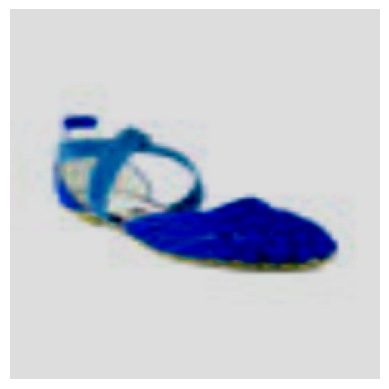

In [16]:

test_images = []
for i in range(len(merged_test_dataset)):
    sample = merged_test_dataset[i]
    image = sample[0]  # this should be a PIL image or a tensor
    if hasattr(image, 'permute'):  # it's likely a torch.Tensor
        image = image.permute(1, 2, 0).numpy()  # convert CHW to HWC
    test_images.append(image)
test_images = np.array(test_images)
# Display the first image
plt.imshow(test_images[645])
plt.axis("off")
plt.show()


In [19]:
id2name = dict(zip(merged_test_dataset.df.articleTypeId, merged_test_dataset.df.articleTypeName))

# now make a classes list where classes[label] is the name:
max_id = max(id2name.keys())
classes = [id2name[i] for i in range(max_id+1)]

TypeError: 'int' object is not callable

In [26]:
def average_precision(sorted_class_vals, true_class):
    ind = sorted_class_vals == true_class
    num_positive = ind.sum()
    cum_ind = np.cumsum(ind).astype(np.float32)
    enum = np.array(range(1, len(ind)+1)).astype(np.float32)
    return np.sum(cum_ind * ind / enum) / num_positive


printing_stats = False
correct_predictions = 0
N = 1500
max = 0 
for k in range(N):
    sorted_idx = list((np.argsort(distances[k,:])))
    sorted_idx = sorted_idx[1:]

    if ((test_labels[k] == merged_test_dataset.targets[sorted_idx[0]]) or
        (test_labels[k] == merged_test_dataset.targets[sorted_idx[1]]) or
        (test_labels[k] == merged_test_dataset.targets[sorted_idx[2]])):
        correct_predictions += 1

    if printing_stats:
        print(correct_predictions)
        print("------------------------")
        print("True class:")
        print(classes[test_labels[k]])
        print("Top 3 predicted:")
        print([classes[merged_test_dataset.targets[i]] for i in sorted_idx[:3]])
        print("Average precision {}".format(average_precision(test_labels[sorted_idx], test_labels[k])))
        print()

    if average_precision(test_labels[sorted_idx], test_labels[k]) > max:
        max = average_precision(test_labels[sorted_idx], test_labels[k])
    
    #average_precision(test_labels[sorted_idx], test_labels[k])

print(max)
print(correct_predictions / N)

0.18764036326999278
0.164


In [ ]:

'''def average_precision(sorted_class_vals, true_class):
    ind = sorted_class_vals == true_class
    #print(ind)
    num_positive = ind.sum()
    #print(num_positive)
    cum_ind = np.cumsum(ind).astype(np.float32)
    #print(cum_ind)
    enum = np.array(range(1, len(ind)+1)).astype(np.float32)
    #print(enum)
    #print(np.sum(cum_ind * ind / enum) / num_positive)
    #print()
    return np.sum(cum_ind * ind / enum) / num_positive

if hasattr(support_labels, "cpu"):
    support_labels = support_labels.cpu().numpy()
if hasattr(test_labels, "cpu"):
    test_labels = test_labels.cpu().numpy()

distances = cdist(test_embeddings, support_embeddings)
N_test = 1500
mAP = 0.0 

for k in range(N_test):
    sorted_idx = np.argsort(distances[k])
    mAP += average_precision(support_labels[sorted_idx], test_labels[k])
mAP /= N_test

print('mAP = {}'.format(mAP))'''

mAP = 0.03639178184746138


Fot the next part, Imma do some assumtion because really I have no idea how to proceed otherwise. Then we will eventually refactor and andjust the code according to the specifics

Error rates: [0.0, 0.061, 0.221, 0.352, 0.413, 0.527, 0.559, 0.621, 0.682, 0.73, 0.738, 0.738, 0.738, 0.738, 0.738, 0.738, 0.741, 0.775, 0.825, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833, 0.833]
Coverages: [0.0, 0.002, 0.011, 0.022, 0.041, 0.062, 0.099, 0.16, 0.229, 0.327, 0.428, 0.532, 0.678, 0.783, 0.851, 0.89, 0.922, 0.947, 0.968, 0.979, 0.985, 0.988, 0.989, 0.992, 0.993, 0.995, 0.996, 0.997, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0

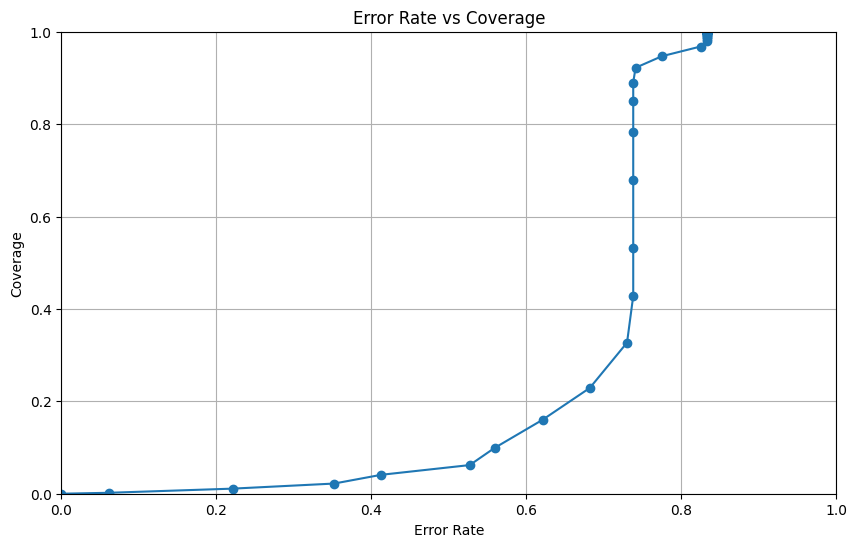

In [52]:
# error rate needs to go from 0 to 1 and need to be seen on the x axis
# covarage needs to go from 0 to 1 and need to be seen on the y axis
def compute_error_rate_and_coverage(distances, support_labels, test_labels, threshold):
    error_rate = 0.0
    coverage = 0.0
    N_test = 1000

    for k in range(N_test):
        sorted_idx = list(np.argsort(distances[k, :]))
        sorted_idx = sorted_idx[1:]
        
        if ((test_labels[k] != merged_test_dataset.targets[sorted_idx[0]]) and
        (test_labels[k] != merged_test_dataset.targets[sorted_idx[1]]) and
        (test_labels[k] != merged_test_dataset.targets[sorted_idx[2]]) and
        average_precision(test_labels[sorted_idx], test_labels[k]) < threshold):
            error_rate += 1
        
        '''print(test_labels[k])
        print(merged_test_dataset.targets[sorted_idx[0]])
        print(error_rate)
        print("------------------------")
        print("True class:")
        print(classes[test_labels[k]])
        print("Top 3 predicted:")
        print([classes[merged_test_dataset.targets[i]] for i in sorted_idx[:3]])
        print("Average precision {}".format(average_precision(test_labels[sorted_idx], test_labels[k])))
        print()'''

        if (distances[k, sorted_idx[0]] < threshold or
            distances[k, sorted_idx[1]] < threshold or 
            distances[k, sorted_idx[2]] < threshold):
            coverage += 1

    error_rate /= N_test
    coverage /= N_test
    return error_rate, coverage

# Example usage
thresholds = np.linspace(0, 1, 100)
error_rates = []
coverages = []
for threshold in thresholds:
    error_rate, coverage = compute_error_rate_and_coverage(distances, support_labels, test_labels, threshold)
    error_rates.append(error_rate)
    coverages.append(coverage)

print("Error rates:", error_rates)
print("Coverages:", coverages)
# Plotting the error rate vs coverage
plt.figure(figsize=(10, 6))
plt.plot(error_rates, coverages, marker='o')
plt.title('Error Rate vs Coverage')
plt.xlabel('Error Rate')
plt.ylabel('Coverage')
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()


## Task 4

In [53]:
# your solution
# datasets: first 10 classes of train_dataset and main_test_dataset

def filter_first_n_classes(embeddings, labels, n=10):
    mask = labels < n
    return embeddings[mask], labels[mask]

n_classes_to_plot = 10
embeddings_train_10, labels_train_10 = filter_first_n_classes(embeddings2, labels2, n_classes_to_plot)
embeddings_test_10, labels_test_10 = filter_first_n_classes(embeddings1, labels1, n_classes_to_plot)

NameError: name 'embeddings2' is not defined

In [26]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def reduce_dimensions(embeddings, method='tsne'):
    if method == 'tsne':
        reducer = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
    elif method == 'pca':
        reducer = PCA(n_components=2)
    else:
        raise ValueError("Unsupported method: choose 'tsne' or 'pca'")
    return reducer.fit_transform(embeddings)

reduced_train_2d = reduce_dimensions(embeddings_train_10.numpy(), method='tsne')
reduced_test_2d = reduce_dimensions(embeddings_test_10.numpy(), method='tsne')

c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\gabri\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


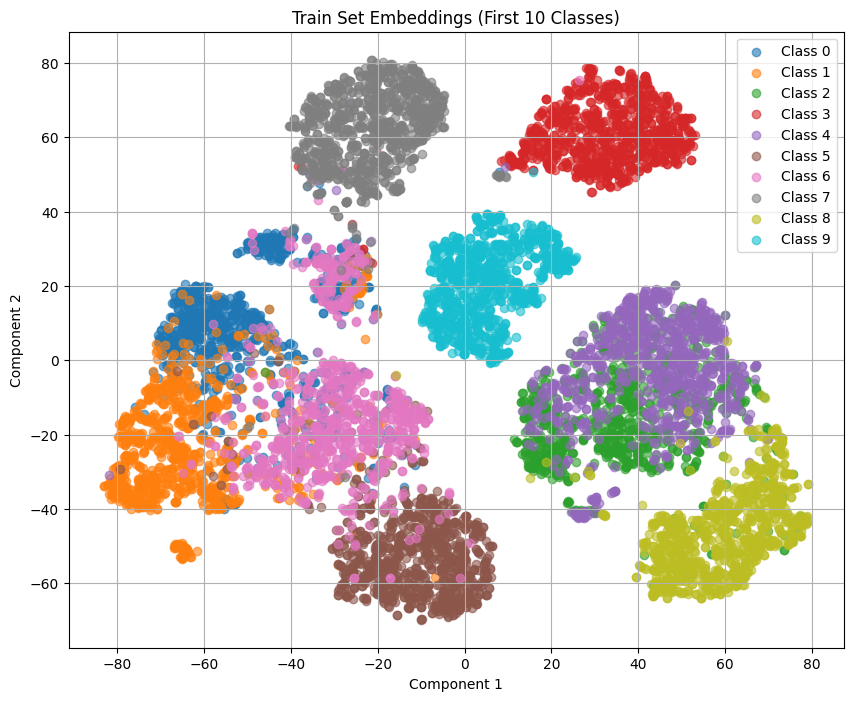

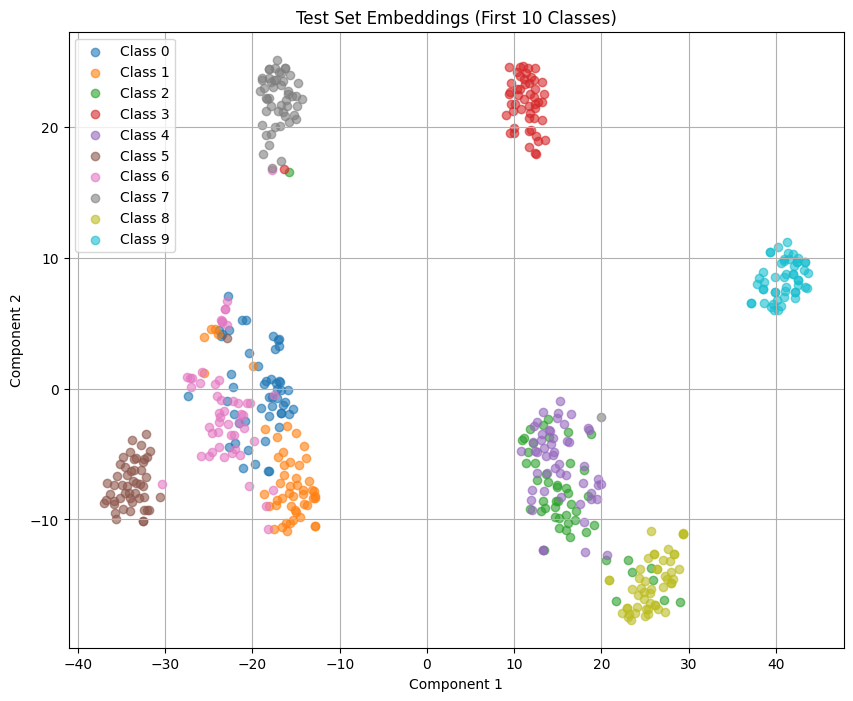

In [27]:
import matplotlib.pyplot as plt

def plot_embeddings(reduced_embeddings, labels, title):
    plt.figure(figsize=(10, 8))
    for label in range(10):
        idx = labels == label
        plt.scatter(reduced_embeddings[idx, 0], reduced_embeddings[idx, 1], label=f'Class {label}', alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

plot_embeddings(reduced_train_2d, labels_train_10.numpy(), title='Train Set Embeddings (First 10 Classes)')
plot_embeddings(reduced_test_2d, labels_test_10.numpy(), title='Test Set Embeddings (First 10 Classes)')

In [ ]:

print(labels_train_10)

tensor([[ 0.2283,  0.2925, -0.0306,  ..., -0.5095,  0.0357,  0.0094],
        [ 0.3099,  0.2405, -0.1020,  ..., -0.4935,  0.0035,  0.0139],
        [ 0.1150,  0.2390,  0.1698,  ..., -0.6936, -0.0403, -0.0873],
        ...,
        [ 0.7448,  0.3039, -0.3113,  ..., -0.5233,  0.4332, -0.0162],
        [ 0.4109,  0.2529,  0.0431,  ..., -0.5696,  0.1319,  0.0979],
        [ 0.4592,  0.1968, -0.0703,  ..., -0.5323,  0.2572,  0.0452]])
tensor([9, 9, 9,  ..., 7, 7, 7])


In [29]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(labels_train_10, labels_test_10)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

import matplotlib.pyplot as plt
cm_display.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [9210, 510]